In [ ]:
!pip3 install -q kaggle

In [ ]:
import numpy as np
import pandas as pd
import os
import random 
from shutil import copyfile
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.utils import shuffle
import seaborn as sns

from tqdm import tqdm

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import backend as K 
K.set_image_data_format('channels_last')

#Obtenção de dados

In [ ]:
kjson = pd.read_json('kaggle.json', typ='series')

In [ ]:
os.environ['KAGGLE_USERNAME']= "emillyvictoria"
os.environ['KAGGLE_KEY']= kjson.key
#login para fazer o download diretamente de datasets

In [ ]:
!kaggle datasets download --force tourist55/alzheimers-dataset-4-class-of-images

 50% 17.0M/34.1M [00:00<00:00, 52.0MB/s]
100% 34.1M/34.1M [00:00<00:00, 97.9MB/s]


In [ ]:
!unzip alzheimers-dataset-4-class-of-images.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDe

#Separação e Visualização

In [ ]:
testpath ='/content/Alzheimer_s Dataset/test'
trainpath = '/content/Alzheimer_s Dataset/train'
#copiando o caminho

In [ ]:
os.listdir(trainpath)
#os: biblioteca que conversa com o SO de forma mais inteligente que o python
#a função listdir lista tudo que tem na pasta que especificamos

['MildDemented', 'VeryMildDemented', 'NonDemented', 'ModerateDemented']

In [ ]:
os.listdir(trainpath + '/NonDemented')

['nonDem2011.jpg',
 'nonDem2456.jpg',
 'nonDem1988.jpg',
 'nonDem180.jpg',
 'nonDem1732.jpg',
 'nonDem1294.jpg',
 'nonDem1490.jpg',
 'nonDem1346.jpg',
 'nonDem2243.jpg',
 'nonDem2083.jpg',
 'nonDem158.jpg',
 'nonDem945.jpg',
 'nonDem1772.jpg',
 'nonDem854.jpg',
 'nonDem1867.jpg',
 'nonDem1319.jpg',
 'nonDem2465.jpg',
 'nonDem286.jpg',
 'nonDem415.jpg',
 'nonDem2229.jpg',
 'nonDem1866.jpg',
 'nonDem2539.jpg',
 'nonDem556.jpg',
 'nonDem24.jpg',
 'nonDem489.jpg',
 'nonDem314.jpg',
 'nonDem922.jpg',
 'nonDem1785.jpg',
 'nonDem807.jpg',
 'nonDem997.jpg',
 'nonDem1036.jpg',
 'nonDem357.jpg',
 'nonDem2228.jpg',
 'nonDem933.jpg',
 'nonDem1596.jpg',
 'nonDem1243.jpg',
 'nonDem1790.jpg',
 'nonDem702.jpg',
 'nonDem1696.jpg',
 'nonDem1554.jpg',
 'nonDem2278.jpg',
 'nonDem1498.jpg',
 'nonDem1626.jpg',
 'nonDem2226.jpg',
 'nonDem1384.jpg',
 'nonDem1869.jpg',
 'nonDem2275.jpg',
 'nonDem2410.jpg',
 'nonDem1765.jpg',
 'nonDem1413.jpg',
 'nonDem1161.jpg',
 'nonDem351.jpg',
 'nonDem88.jpg',
 'nonDem93.jp

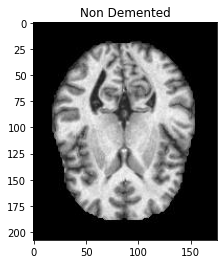

In [ ]:
example_path = trainpath + '/NonDemented/nonDem882.jpg'
example_img = cv2.imread(example_path)
#cv2: biblioteca que lida muito bem com imagens 2d 

plt.imshow(example_img)
plt.title('Non Demented')
plt.show()

In [ ]:
example_img.shape
#208x176 e 3 é a escala de cor RGB
#obs: quando a escala é 1 significa que a imagem é preto e branco somente

(208, 176, 3)

In [ ]:
example_img
#números por trás da imagem

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

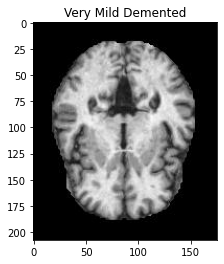

In [ ]:
example_folder_path = trainpath + '/VeryMildDemented'
example_path = example_folder_path + "/" + os.listdir(example_folder_path)[0]
example_img = cv2.imread(example_path)

plt.imshow(example_img)
plt.title('Very Mild Demented')
plt.show()

In [ ]:
train_path_list = []
test_path_list = []

ytrain = []
ytest =[]
#esse código cria uma lista de caminhos para treino e teste e depois definimos as targets

for i in os.listdir(trainpath + '/NonDemented'):
  path = trainpath + '/NonDemented' + '/' + i
  train_path_list.append
  ytrain.append(0)
#percorre todos os itens da pasta "trainpath + '/NonDemented'"
#o i é sempre um item do jpeg
#path = trainpath + '/NonDemented' + '/' + i --> camonho até as imagens de treino
#train_path_list.append --> vai add na lista


for i in os.listdir(trainpath + '/ModerateDemented'):
  path = trainpath + '/ModerateDemented' + '/' + i
  train_path_list.append
  ytrain.append(1)

for i in os.listdir(trainpath + '/MildDemented'):
  path = trainpath + '/MildDemented' + '/' + i
  train_path_list.append
  ytrain.append(2)

for i in os.listdir(trainpath + '/VeryMildDemented'):
  path = trainpath + '/VeryMildDemented' + '/' + i
  train_path_list.append
  ytrain.append(3)

for i in os.listdir(testpath + '/NonDemented'):
  path = testpath + '/NonDemented' + '/' + i
  test_path_list.append
  ytest.append(0)

for i in os.listdir(testpath + '/ModerateDemented'):
  path = testpath + '/ModerateDemented' + '/' + i
  test_path_list.append
  ytest.append(1)

for i in os.listdir(testpath + '/MildDemented'):
  path = testpath + '/MildDemented' + '/' + i
  test_path_list.append
  ytest.append(2)

for i in os.listdir(testpath + '/VeryMildDemented'):
  path = testpath + '/VeryMildDemented' + '/' + i
  test_path_list.append
  ytest.append(3)
  



In [ ]:
for i,j in enumerate (['a','b','c']):
  print (i,j)

0 a
1 b
2 c


In [ ]:
train_path_list = []
test_path_list = []

ytrain = []
ytest =[]

for num_classe,classe in enumerate(os.listdir(trainpath)):

  for jpg in os.listdir(trainpath + '/' + classe):
    path = trainpath + '/' + classe +  '/' + jpg
    train_path_list.append(path)
    ytrain.append(num_classe)

for num_classe,classe in enumerate(os.listdir(testpath)):
  
  for jpg in os.listdir(testpath + '/' + classe):
    path = testpath + '/' + classe +  '/' + jpg
    test_path_list.append(path)
    ytest.append(num_classe)

In [ ]:
len(train_path_list)

5121

In [ ]:
len(test_path_list)

1279

#Shuffle

In [ ]:
#o shuffle randomiza um pouco os dados que listamos
train_path_list, ytrain = shuffle(train_path_list, ytrain, random_state = 42)
test_path_list, ytest = shuffle(test_path_list, ytest, random_state= 42)

In [ ]:
ytrain [:20]

[0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1]

#Dimensão e Visualização

In [ ]:
dimensao_1 = []
dimensao_2 = []
#gera uma array de dimensão

for image_filename in tqdm(train_path_list):
    img = imread(image_filename)
    try:
      eixo_1, eixo_2 = img.shape
    except:
      eixo_1, eixo_2, cor = img.shape
    dimensao_1.append(eixo_1)
    dimensao_2.append(eixo_2)
#percorre as imagens de teste
#tqdm é a barrinha de %

100%|██████████| 5121/5121 [00:02<00:00, 2288.80it/s]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


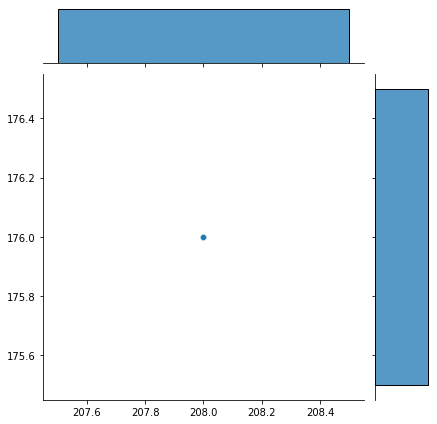

In [ ]:
sns.jointplot(dimensao_1,dimensao_2)
#cria um scaterplot com a dimensão de um histograma
#de acordo com o gráfico, infere-se que todos os dados tem a mesma dimensaõ pois só tem uma bolinha no centro

#Transfromar path em arrays

In [ ]:
# Vale a pena testar diferentes shapes e ver a diferença de resultados.
# Muitas vezes dimensões reduzidas reduzem a quantidade de parâmetros necessários sem perder performance no modelo.

#dim1 = 208
#dim2 = 176

dim1 = 64
dim2 = 64

In [ ]:
#transforma os caminhos em imagens em si
Xtrain = []
Xtest = []

for i in train_path_list:
  image = cv2.imread(i) #transforma o i (caminho) em imagem
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #muda a cor da imagem para cinza
  image = cv2.resize(image, (dim1, dim2)) #muda o tamanho das imagens para as dimensões acima

  Xtrain.append(image)

for i in test_path_list:
  image = cv2.imread(i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (dim1, dim2))

  Xtest.append(image)


In [ ]:
Xtrain = np.array(Xtrain)/255
Xtest = np.array(Xtest)/255

In [ ]:
Xtrain.shape

(5121, 64, 64)

In [ ]:
Xtrain = Xtrain.reshape(-1,dim1,dim2,1)
Xtest = Xtest.reshape(-1,dim1,dim2,1)
#adicionando o 1 (COR)

In [ ]:
Xtrain.shape

(5121, 64, 64, 1)

#Multiclass y

In [ ]:
ytrain[:5]

[0, 1, 1, 1, 1]

In [ ]:
ycat_train = to_categorical(ytrain,4)
ycat_test = to_categorical(ytest,4)
#transoforma em categoria

In [ ]:
ycat_train[6]

array([0., 0., 1., 0.], dtype=float32)

#CNN

In [ ]:
#adicionando camadas
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(dim1,dim2,1), activation='relu'))#convolução: filtro que passa pelos pixels da imagem
model.add(MaxPooling2D(pool_size=(2, 2))) #reduz a dimensão capturando as features mais importantes, ou seja, as maiores

model.add(Flatten()) #transforma tudo em uma dimensão somente

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer='adam', #indica oq o modelo pode fazer para melhorar
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
# categorico: softmax -> loss = 'categorical_crossentropy'
# binario: sigmoid -> loss = 'binary_crossentropy'

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               7872768   
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                      

In [ ]:
bs = 16
results = model.fit(Xtrain, ycat_train, epochs=3, validation_data=(Xtest,ycat_test), batch_size=bs)

Epoch 1/3
321/321 [==============================] - 33s 99ms/step - loss: 0.8931 - accuracy: 0.6026 - val_loss: 1.0559 - val_accuracy: 0.5442
Epoch 2/3
321/321 [==============================] - 29s 90ms/step - loss: 0.4435 - accuracy: 0.8325 - val_loss: 1.0902 - val_accuracy: 0.5794
Epoch 3/3
321/321 [==============================] - 29s 89ms/step - loss: 0.1973 - accuracy: 0.9422 - val_loss: 1.2191 - val_accuracy: 0.5997


#Melhorando o modelo

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(dim1,dim2,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) #modelo esquece oq ele aprendeu
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(dim1,dim2,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))


model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               7872768   
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                      

In [ ]:
image_gen = ImageDataGenerator(rotation_range=5,
                               width_shift_range=0.05,
                               height_shift_range=0.05,
                               shear_range=0.05, 
                               zoom_range=0.1, 
                               fill_mode='nearest' 
                              )
#altera levemente a imagem para o modelo treinar com mais dados

In [ ]:
#callback
#early_stop = EarlyStopping(monitor='val_loss',patience=10) --> monitora o loss da validação
#se o modelo não melhorar ele simplesmente para quando alcançar seu patience

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1, factor = 0.5, min_lr = 0.00001)
#aqui ele diminui o fator de aprendizado dps que alcança o seu patience

In [ ]:
BS = 16
results = model.fit_generator(image_gen.flow(Xtrain, ycat_train, batch_size=BS),
                              steps_per_epoch=len(Xtrain)/BS, epochs=150,
                              validation_data=(Xtest,ycat_test), callbacks = [reduce_lr])

Epoch 1/150
  1/320 [..............................] - ETA: 34s - loss: 0.0642 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


320/320 [==============================] - 30s 94ms/step - loss: 0.1450 - accuracy: 0.9442 - val_loss: 1.1068 - val_accuracy: 0.6951 - lr: 1.0000e-05
Epoch 2/150
320/320 [==============================] - 32s 100ms/step - loss: 0.1385 - accuracy: 0.9520 - val_loss: 1.1029 - val_accuracy: 0.6935 - lr: 1.0000e-05
Epoch 3/150
320/320 [==============================] - 30s 93ms/step - loss: 0.1428 - accuracy: 0.9496 - val_loss: 1.1053 - val_accuracy: 0.6935 - lr: 1.0000e-05
Epoch 4/150
320/320 [==============================] - 30s 93ms/step - loss: 0.1381 - accuracy: 0.9494 - val_loss: 1.0939 - val_accuracy: 0.6959 - lr: 1.0000e-05
Epoch 5/150
320/320 [==============================] - 30s 93ms/step - loss: 0.1433 - accuracy: 0.9486 - val_loss: 1.1092 - val_accuracy: 0.6943 - lr: 1.0000e-05
Epoch 6/150
320/320 [==============================] - 30s 93ms/step - loss: 0.1426 - accuracy: 0.9510 - val_loss: 1.1080 - val_accuracy: 0.6951 - lr: 1.0000e-05
Epoch 7/150
320/320 [==================

KeyboardInterrupt: ignored

In [ ]:
model.metrics_names

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()
plt.show()

KeyError: ignored

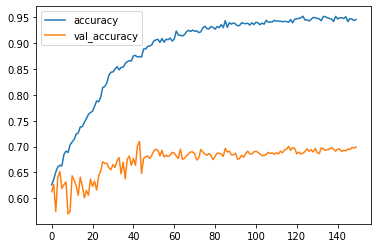

In [ ]:
losses[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
pred = model.predict_classes(Xtest)

In [ ]:
prob = model.predict(Xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))


NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred)

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(ytest, prob, figsize=(8,8), curves='each_class')